<a href="https://colab.research.google.com/github/Aditya0870/Machine-Learning/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/WineQT.csv')

data['quality'] = data['quality'].apply(lambda x: 0 if x <= 6 else 1)

features = data.drop('quality', axis=1)

scaler = MinMaxScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

final_data = pd.concat([scaled_features, data['quality']], axis=1)

final_data.to_csv('normalized_winequality.csv', index=False)

final_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.000000,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0.000626,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0.001252,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,0.001879,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.002505,0


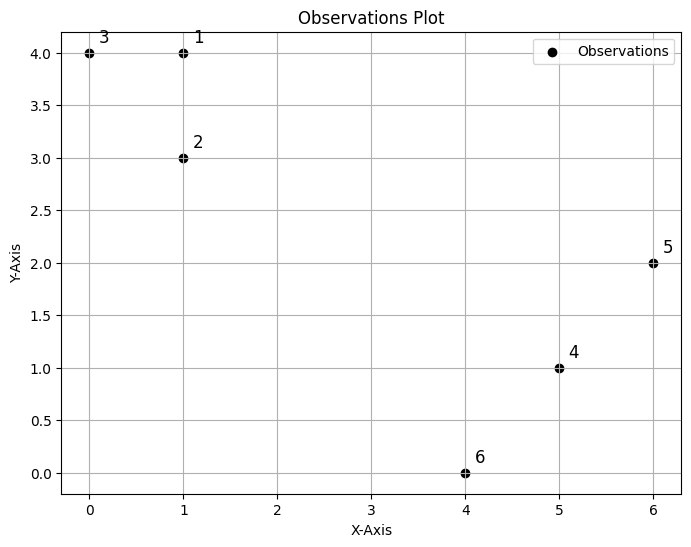

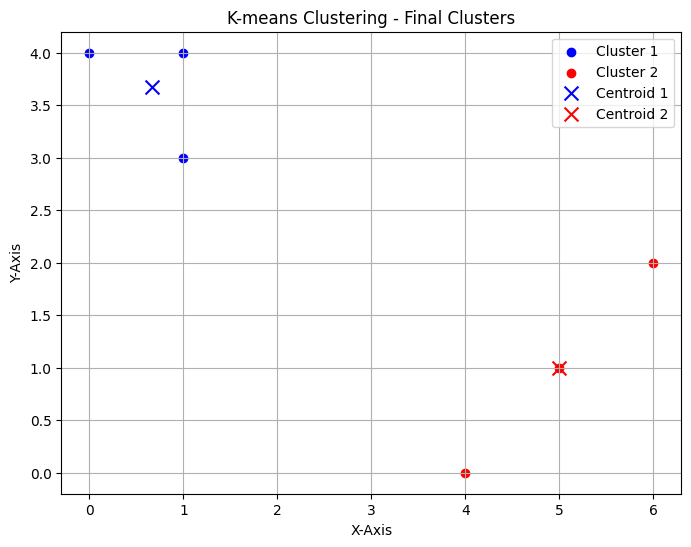

In [7]:
import matplotlib.pyplot as plt

points = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]

plt.figure(figsize=(8, 6))
plt.scatter(*zip(*points), color='black', label='Observations')

for i, point in enumerate(points, start=1):
    plt.text(point[0] + 0.1, point[1] + 0.1, f'{i}', fontsize=12)

plt.title("Observations Plot")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.legend()
plt.grid(True)
plt.show()

labels = [1, 1, 1, 2, 2, 2]

cluster_1 = [points[i] for i in range(len(points)) if labels[i] == 1]
cluster_2 = [points[i] for i in range(len(points)) if labels[i] == 2]

plt.figure(figsize=(8, 6))
plt.scatter(*zip(*cluster_1), color='blue', label='Cluster 1')
plt.scatter(*zip(*cluster_2), color='red', label='Cluster 2')

centroid_1 = (0.67, 3.67)
centroid_2 = (5.00, 1.00)
plt.scatter(*centroid_1, color='blue', marker='x', s=100, label='Centroid 1')
plt.scatter(*centroid_2, color='red', marker='x', s=100, label='Centroid 2')

plt.title("K-means Clustering - Final Clusters")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.legend()
plt.grid(True)
plt.show()


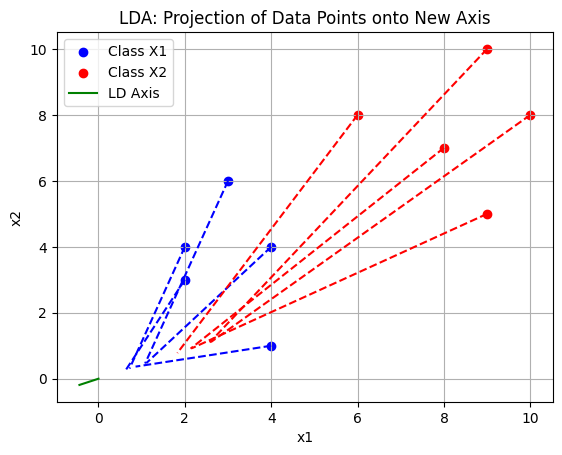

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X1 = np.array([[4, 1], [2, 4], [2, 3], [3, 6], [4, 4]])
X2 = np.array([[9, 10], [6, 8], [9, 5], [8, 7], [10, 8]])

mu1 = np.mean(X1, axis=0)
mu2 = np.mean(X2, axis=0)

S_W = np.dot((X1 - mu1).T, (X1 - mu1)) + np.dot((X2 - mu2).T, (X2 - mu2))
S_B = np.outer(mu1 - mu2, mu1 - mu2)

w = np.dot(np.linalg.inv(S_W), (mu1 - mu2))

y1 = np.dot(X1, w)
y2 = np.dot(X2, w)

plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class X1')
plt.scatter(X2[:, 0], X2[:, 1], color='red', label='Class X2')
plt.plot([0, w[0]], [0, w[1]], color='green', label='LD Axis')

for i in range(X1.shape[0]):
    plt.plot([X1[i, 0], y1[i] * w[0]], [X1[i, 1], y1[i] * w[1]], 'b--')
for i in range(X2.shape[0]):
    plt.plot([X2[i, 0], y2[i] * w[0]], [X2[i, 1], y2[i] * w[1]], 'r--')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('LDA: Projection of Data Points onto New Axis')
plt.grid(True)
plt.show()
